##  we predicts by     "f(x1,x2,x3,...,xn) = w0 + w1x1 + w2x2 + w3x3 + ... + wnxn" -this formula
## not "Y = mx + b"
### i work with a feature, not all

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [2]:
diabetes = datasets.load_diabetes()         # there is 11 datasets are built in with sklearn.

In [3]:
diabetes_keys = diabetes.keys()

In [4]:
diabetes_keys

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [6]:
diabetes.data     # this are the all data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [7]:
len(diabetes.data)

442

In [8]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
diabetes.target                 # this are the blood pressure.

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [10]:
diabetes.frame

In [11]:
diabetes.data_filename

'diabetes_data_raw.csv.gz'

In [12]:
diabetes.data_module

'sklearn.datasets.data'

In [13]:
diabetes_X = diabetes.data[:, np.newaxis, 2]   # here we make this algorithm with a data not all, now we slice the data - 
diabetes_X # ' ':'- mean all, then 'newaxis'- give everytime new axis, then '2'- is index '

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [14]:
diabetes_X_train = diabetes_X[: -30]   # from first to last 30's above
diabetes_X_train

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [15]:
diabetes_X_test = diabetes_X[-20:]    # last 20 data
diabetes_X_test

array([[ 0.07786339],
       [-0.03961813],
       [ 0.01103904],
       [-0.04069594],
       [-0.03422907],
       [ 0.00564998],
       [ 0.08864151],
       [-0.03315126],
       [-0.05686312],
       [-0.03099563],
       [ 0.05522933],
       [-0.06009656],
       [ 0.00133873],
       [-0.02345095],
       [-0.07410811],
       [ 0.01966154],
       [-0.01590626],
       [-0.01590626],
       [ 0.03906215],
       [-0.0730303 ]])

In [16]:
diabetes_Y_train = diabetes.target[:-30]  # same like above. just we take from 'target' it means 'blood pressure' without last 30 data.

In [17]:
diabetes_Y_test = diabetes.target[-20:]

In [18]:
model = linear_model.LinearRegression()
a = model.fit(diabetes_X_train, diabetes_Y_train)  # our dataset is ready to predict.

In [19]:
diabetes_Y_predected = model.predict(diabetes_X_test)   # this is the predicted 

In [20]:
mean_squared_error(diabetes_Y_test, diabetes_Y_predected)   # so much error!

2561.3204277283853

In [21]:
print('weights: ', model.coef_)   # 'coef_' -is coefficients    # this is the value of: 'm'
print('Intercept: ', model.intercept_)                          # this is the value of: 'b' -> y = mx = b

weights:  [941.43097333]
Intercept:  153.39713623331644


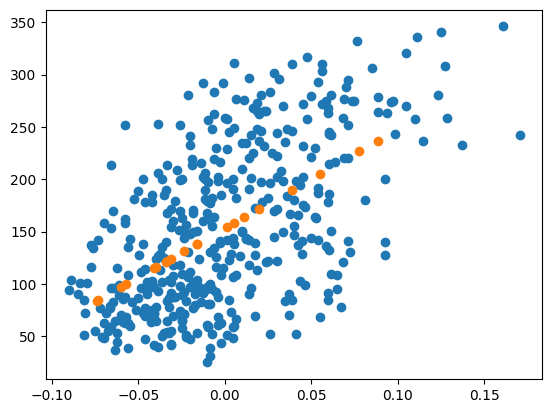

In [22]:
plt.scatter(diabetes_X_train, diabetes_Y_train) # scatter plot!
plt.scatter(diabetes_X_test, diabetes_Y_predected) # scatter plot!

plt.show()

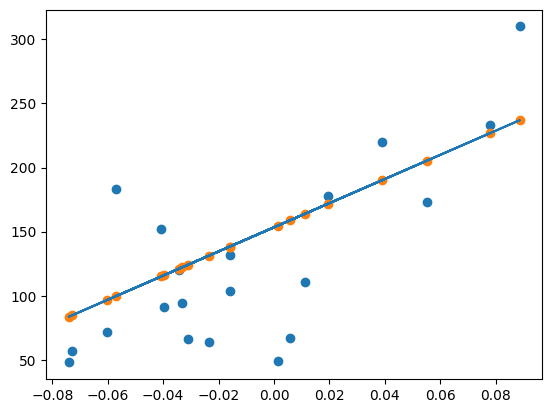

In [23]:
plt.scatter(diabetes_X_test, diabetes_Y_test) # to show test data on plot!
plt.scatter(diabetes_X_test, diabetes_Y_predected)
plt.plot(diabetes_X_test, diabetes_Y_predected) # this is predicted line
plt.show()